# Tapşırıq 7.

## Xahiş edirəm, ötən il tətbiq etdiyimiz endirim kompaniyalarının hansının daha uğurlu olduğunu əks etdirən qrafik hazırlayın. Yəni, müştərilərimiz ən çox hansı kompaniyamızdan yararlanıb?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("esas_mehsullar.csv")
df = data.copy()
df.head()

,column_a,satish_kodu,mehsul_kodu,mehsul_ad,mehsul_kateqoriya,mehsul_qiymet,satish_tarixi,endirim_kompaniya,bonus_kart,magaza_ad,magaza_lat,magaza_long,magaza_location
0,0,577571,3334,GONDOL SIMPLE LABABO VE BUZLUK HALISI G61*50,Məişət məhsulları,3.68,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
1,1,577571,4674,TAXTA BICAQ 3232,Qab-qacaq,2.25,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
2,2,577571,8388,VITA 1LT ANANAS SIRESI,Meyvə Şirələri,2.50,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
3,3,577571,6017,GILAN BAGDAN 1LT SARI GAVALI KOMPOTU,Kompotlar,1.45,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
4,4,577571,8297,OSRAM SUPERSTAR LAMPA 64544A ECO 57W E27,Məişət məhsulları,2.92,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)


In [3]:
df["satish_kodu"] = df["satish_kodu"].astype("object")

In [4]:
df["endirim_kompaniya"] = df["endirim_kompaniya"].transform(lambda x: x.replace("S?rf?li Yaz", "Sərfəli Yaz"))

In [5]:
# çatısmayan verilənlər

df.isnull().sum()

column_a                  0
satish_kodu               0
mehsul_kodu               0
mehsul_ad               771
mehsul_kateqoriya         0
mehsul_qiymet           771
satish_tarixi             0
endirim_kompaniya    220929
bonus_kart                0
magaza_ad                 0
magaza_lat                0
magaza_long               0
magaza_location           0
dtype: int64

In [6]:
# çatışmayan lazımsız verilənləri silmək

df.dropna(subset=["mehsul_ad", "mehsul_qiymet"], inplace = True)

In [7]:
df.isnull().sum()

column_a                  0
satish_kodu               0
mehsul_kodu               0
mehsul_ad                 0
mehsul_kateqoriya         0
mehsul_qiymet             0
satish_tarixi             0
endirim_kompaniya    220560
bonus_kart                0
magaza_ad                 0
magaza_lat                0
magaza_long               0
magaza_location           0
dtype: int64

In [8]:
# kompaniyalar üzrə müştəri sayı

say = df.groupby("endirim_kompaniya")["satish_kodu"].apply(lambda x: x.count()).sort_values()
say = pd.DataFrame(say)
say

,satish_kodu
endirim_kompaniya,
Payız endirimləri,35566
Yeni il fürsətləri,35745
Bərəkətli Novruz,36660
Sərfəli Yaz,36773
Sərin Yay günləri,72751


In [9]:
# kompaniyalar üzrə ümumi gəlir

gelir = df.groupby("endirim_kompaniya")["mehsul_qiymet"].apply(lambda x: x.sum()).sort_values()
gelir = pd.DataFrame(gelir)
gelir

,mehsul_qiymet
endirim_kompaniya,
Payız endirimləri,206987.57
Yeni il fürsətləri,209095.11
Sərfəli Yaz,211757.40
Bərəkətli Novruz,213356.35
Sərin Yay günləri,418929.91


In [10]:
# dataları birləşdirmək

data2 = pd.merge(say,gelir, on = "endirim_kompaniya")
data2

,satish_kodu,mehsul_qiymet
endirim_kompaniya,,
Payız endirimləri,35566,206987.57
Yeni il fürsətləri,35745,209095.11
Bərəkətli Novruz,36660,213356.35
Sərfəli Yaz,36773,211757.40
Sərin Yay günləri,72751,418929.91


In [11]:
# data üzərində düzəlişlər

data2.rename(columns={"satish_kodu" : "musteri_sayi",
                     "mehsul_qiymet" : "umumi_gelir"}, inplace = True)
data2.reset_index(inplace = True)
data2

,endirim_kompaniya,musteri_sayi,umumi_gelir
0,Payız endirimləri,35566,206987.57
1,Yeni il fürsətləri,35745,209095.11
2,Bərəkətli Novruz,36660,213356.35
3,Sərfəli Yaz,36773,211757.40
4,Sərin Yay günləri,72751,418929.91


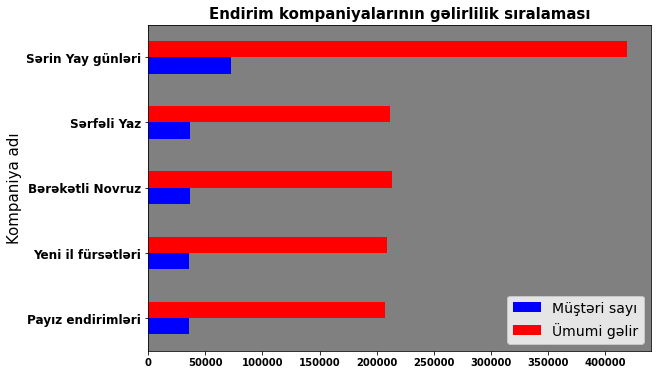

In [12]:
# qrafiklə göstərmək

ax = data2.plot(y = ["musteri_sayi","umumi_gelir"], x = "endirim_kompaniya", kind = "barh", 
           figsize = (9,6),
           color = ["b","r"]);
plt.legend(["Müştəri sayı", "Ümumi gəlir"], fontsize = 14)
plt.ylabel("Kompaniya adı", fontsize = 15);
ax.set_facecolor('grey') 
plt.yticks(fontsize = 12, fontweight = "bold")
plt.xticks(fontsize = 10, fontweight = "bold")
plt.title("Endirim kompaniyalarının gəlirlilik sıralaması", fontsize = 15, fontweight = "bold");
plt.savefig('qrafik.png', dpi = 100, bbox_inches = 'tight')